<a href="https://colab.research.google.com/github/Saravanakumar0077/Amazon_Sales_Analysis/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_csv('/content/sample_data.csv')

# Convert 'InvoiceDate' to datetime and remove missing values
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')
data = data.dropna()



In [16]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
total_sales = data['TotalPrice'].sum()
print(f'Total Sales: Rs {total_sales:.2f}')


Total Sales: Rs 3352.10


In [4]:
best_selling_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(best_selling_products)


Description
Blue Striped Bowl          97
Red Heart Ornament         97
White Ceramic Mug          97
Wooden Picture Frame       84
Green Candle Holder        70
Vintage Glass Vase         70
Silk Flower Arrangement    60
Cotton Table Napkin        47
Name: Quantity, dtype: int64


In [5]:
# Calculate total spent per customer
customer_spending = data.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)
print(customer_spending.head(10))


CustomerID
13716    108.72
13325    106.08
14253     99.12
16960     94.20
15010     91.63
15836     87.00
12826     84.36
12661     81.45
13684     78.39
13644     76.64
Name: TotalPrice, dtype: float64


## **Monthly Sales Trends**

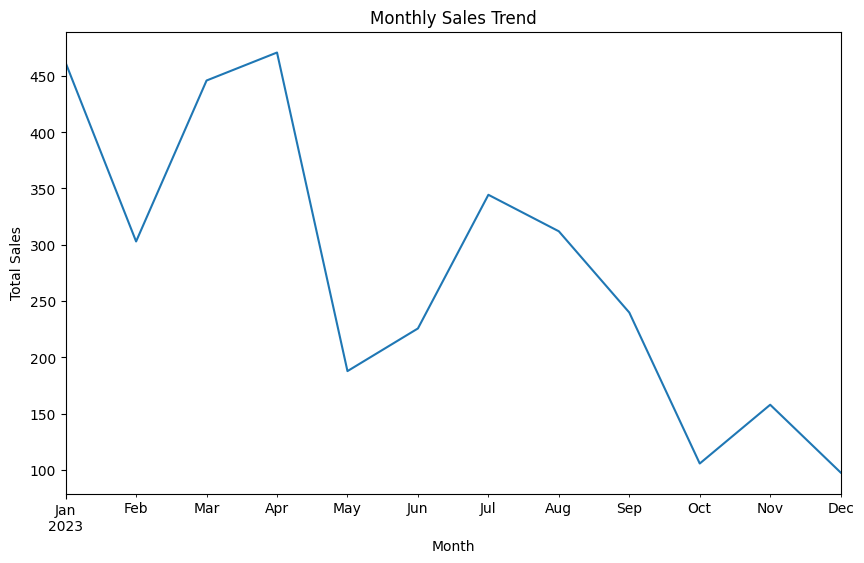

In [7]:
# Extract month and year for grouping
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')
monthly_sales = data.groupby('YearMonth')['TotalPrice'].sum()

# Plot
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


## **Best-Selling Products**

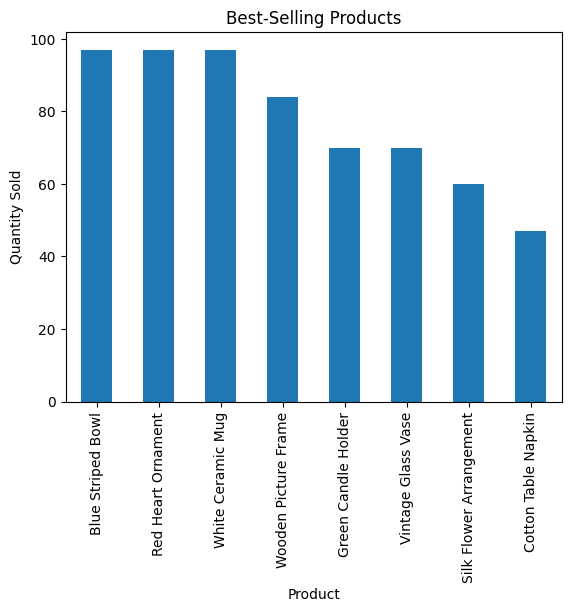

In [9]:
best_selling_products.plot(kind='bar', title='Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.show()


## **Country Wise Sales Distribution**

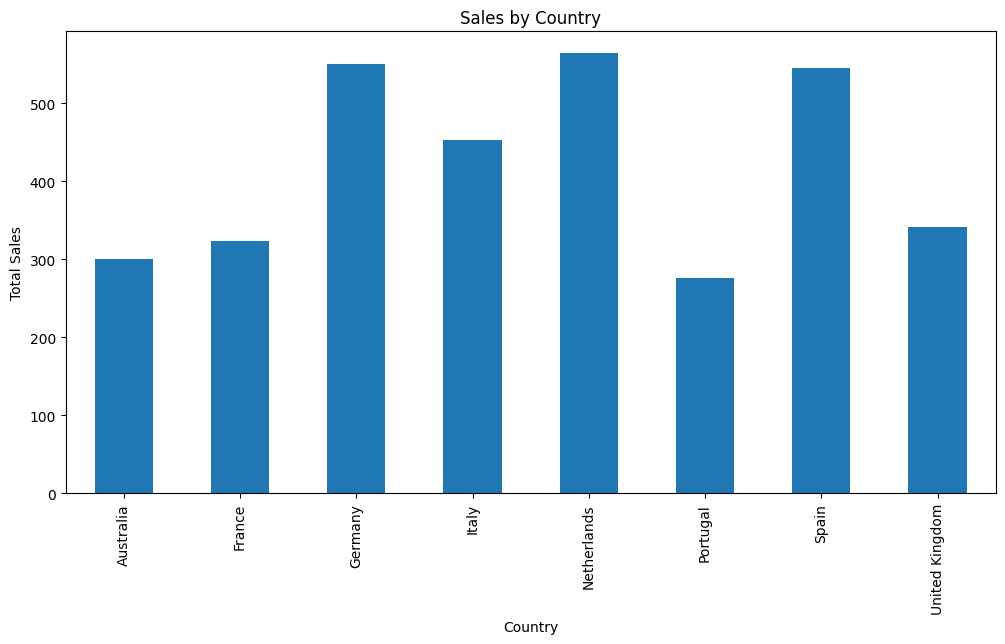

In [10]:
country_sales = data.groupby('Country')['TotalPrice'].sum()
country_sales.plot(kind='bar', title='Sales by Country', figsize=(12, 6))
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()


## **Analyze Customer Purchase Patterns**

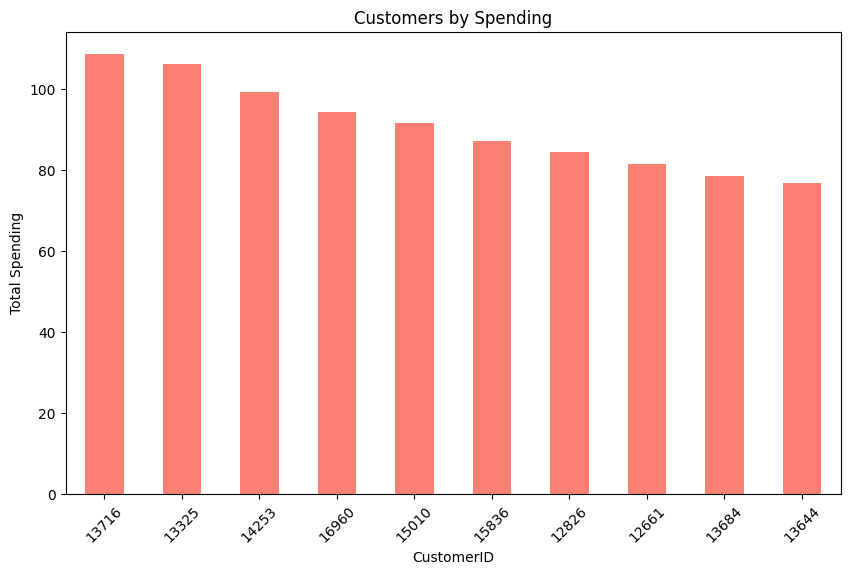

In [19]:
# Calculate total spending per customer
customer_spending = data.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Plot top 10 customers by spending
plt.figure(figsize=(10, 6))
customer_spending.plot(kind='bar', color='salmon')
plt.title('Customers by Spending')
plt.xlabel('CustomerID')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()


## **Geographic Analysis of Sales**

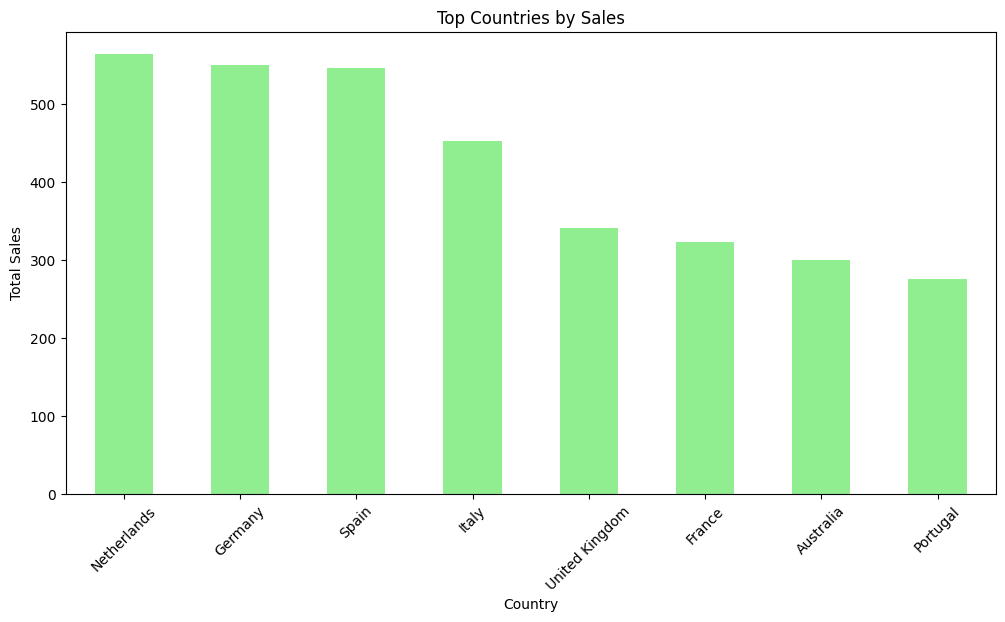

In [21]:
# Sum sales by country
country_sales = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Plot sales by country
plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar', color='lightgreen')
plt.title('Top Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


### **Monthly Sales Trend for Seasonal Analysis**

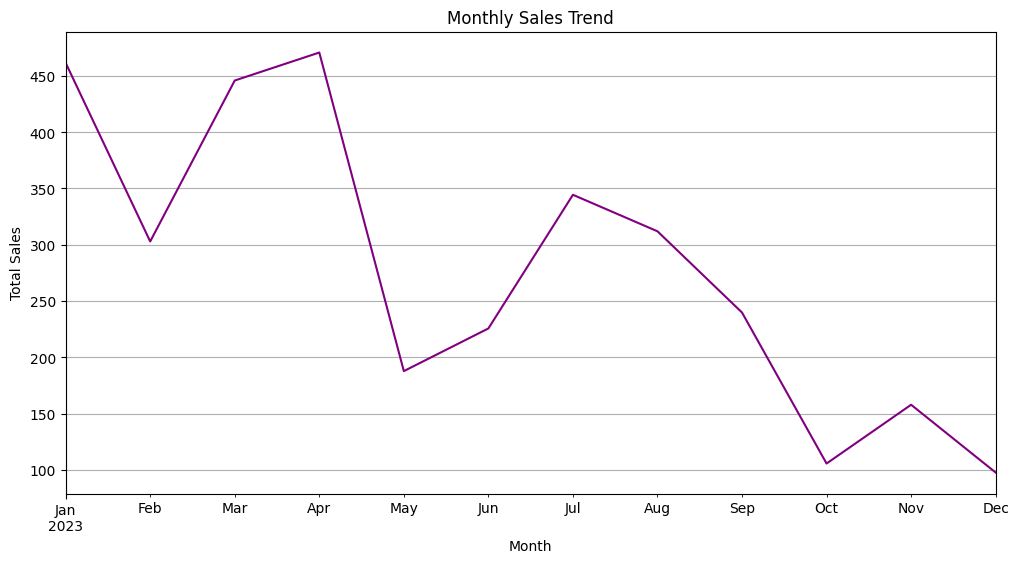

In [22]:
# Extract month and year from InvoiceDate
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')
monthly_sales = data.groupby('YearMonth')['TotalPrice'].sum()

# Plot monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()
